In [1]:
# importando las librería a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

sns.set(context="notebook", style="whitegrid")

In [2]:
import kagglehub
import os

# extrayendo el dataset de kaggle
dataset_kaggle_path = kagglehub.dataset_download("sansuthi/dry-bean-dataset")
csv_path = os.path.join(dataset_kaggle_path, "Dry_Bean.csv")
df_beans = pd.read_csv(csv_path)
df_beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
# verificando valores nulos
df_beans.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

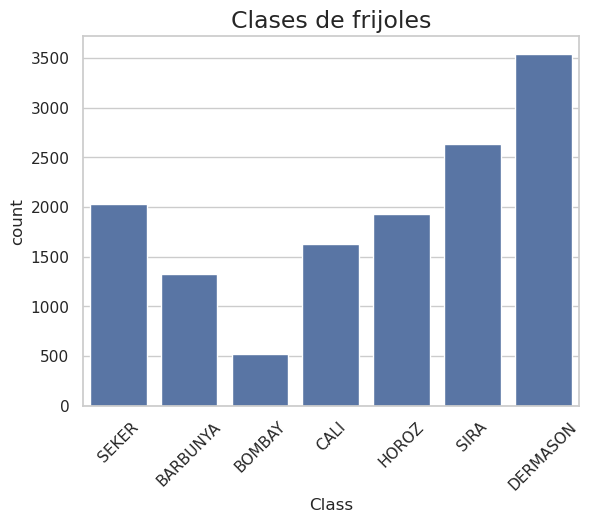

In [4]:
# graficnando la distribución de la variable objetivo
sns.countplot(data=df_beans, x="Class")
plt.title("Clases de frijoles", size=17)
plt.xticks(rotation=45)
plt.show()

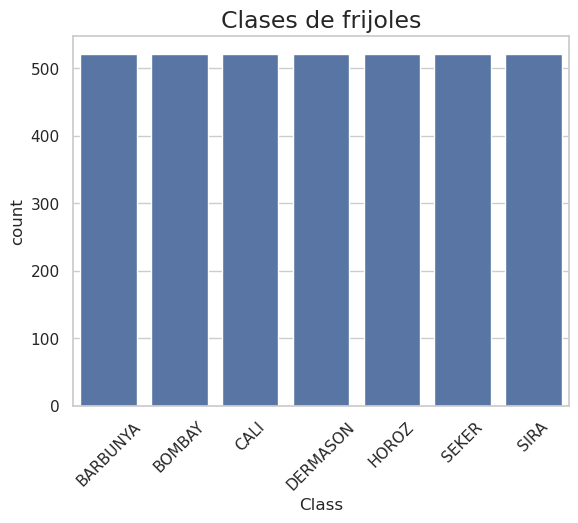

In [5]:
# balanceando los valores de la clase objetivo
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(df_beans.drop("Class", axis=1).values, df_beans[["Class"]])

X_df = pd.DataFrame(X_rus, columns=df_beans.drop("Class", axis=1).columns)
df_beans_rus = pd.concat([X_df, y_rus], axis=1)

sns.countplot(data=df_beans_rus, x="Class")
plt.title("Clases de frijoles", size=17)
plt.xticks(rotation=45)
plt.show()

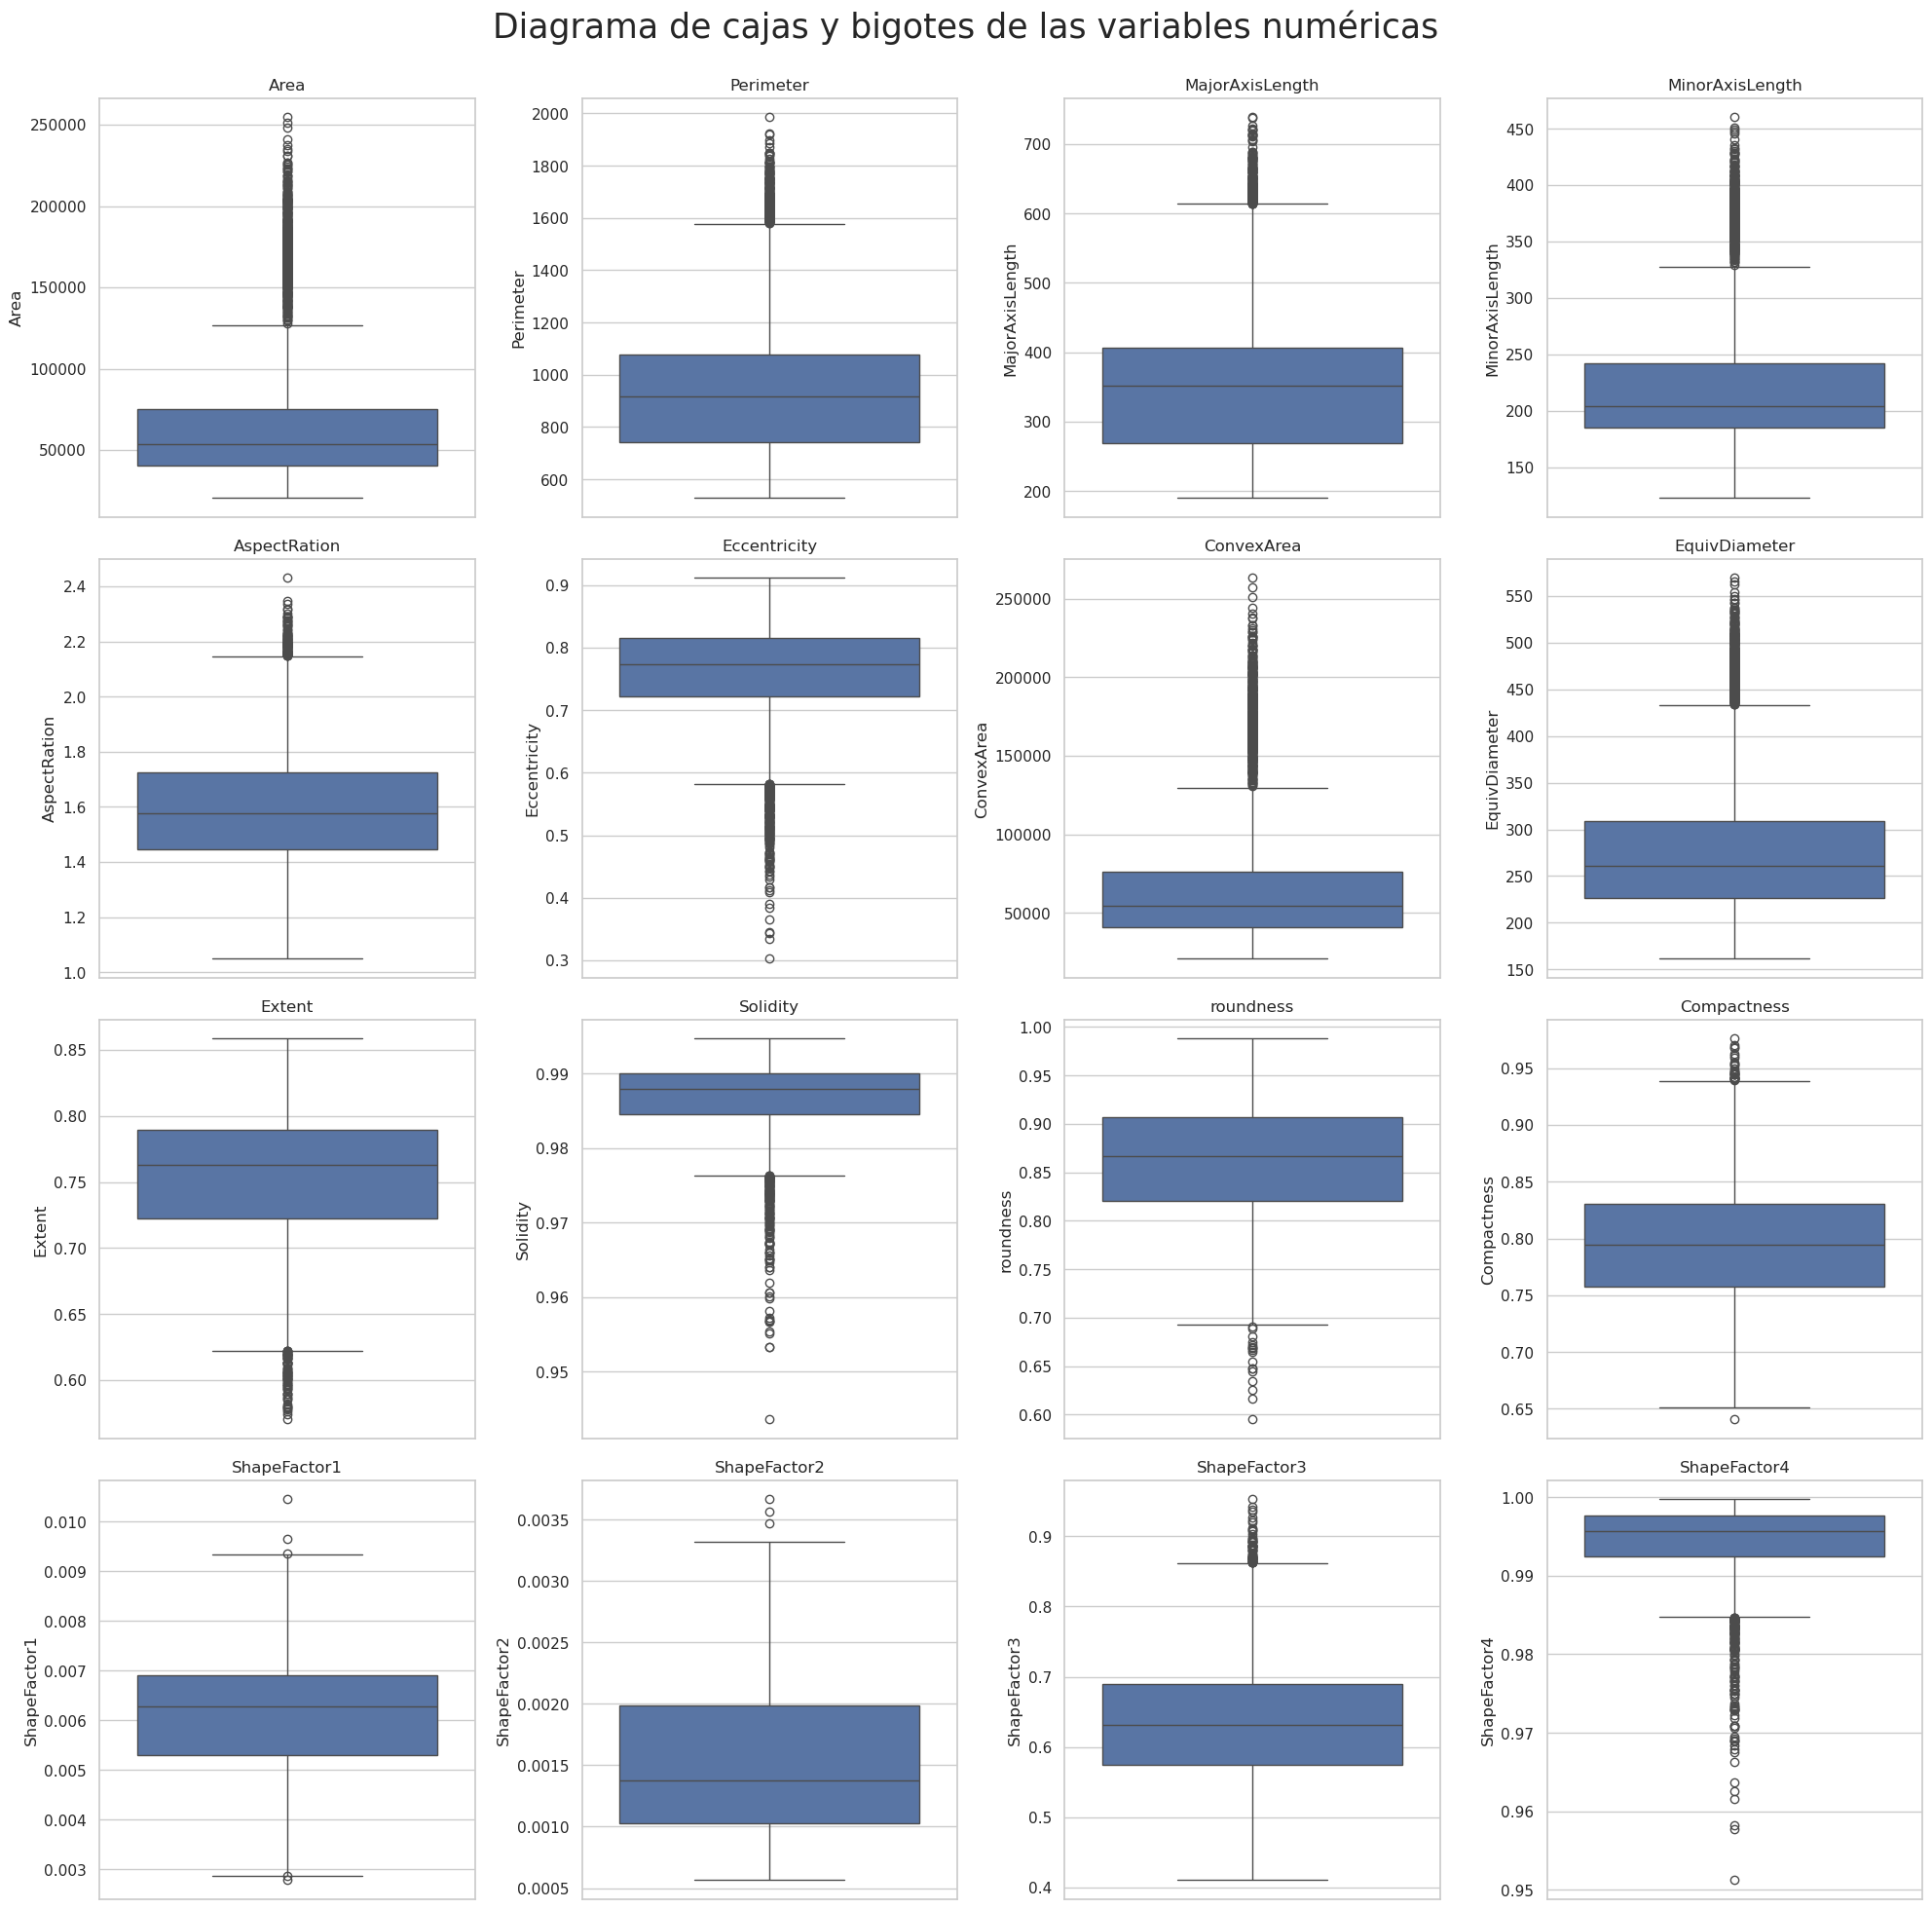

In [6]:
# grafica de cajas y bigotes para todas la variables numéricas
cols_num = df_beans.select_dtypes(exclude="object").columns

fig, ax = plt.subplots(4, 4, figsize=(20, 20))
ax = ax.flat
plt.suptitle("Diagrama de cajas y bigotes de las variables numéricas\n", size=25)
for i, col in enumerate(cols_num):
    sns.boxplot(data=df_beans_rus, y=col, ax=ax[i])
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

In [7]:
df_beans_rus.Class.value_counts()

Class
BARBUNYA    522
BOMBAY      522
CALI        522
DERMASON    522
HOROZ       522
SEKER       522
SIRA        522
Name: count, dtype: int64

In [9]:
# Separando las variables independientes y dependientes
X = df_beans_rus.drop("Class", axis=1)
y = df_beans_rus[["Class"]]

In [10]:
# Separando los valores de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41, stratify=y)

sc_x = StandardScaler()
X_train_sc = sc_x.fit_transform(X_train)
X_test_sc = sc_x.transform(X_test)

In [11]:
# numerando la variable dependiente que es una variable categórica

le = LabelEncoder()
y_le_train = le.fit_transform(y_train.values.reshape(-1))
y_le_test = le.transform(y_test.values.reshape(-1))

In [12]:
# creando y entrenando el modelo
# max_iter=100 por defecto
model_log = LogisticRegressionCV(cv=10, max_iter=2000)

_ = model_log.fit(X_train_sc, y_le_train)

In [13]:
# realizando la predicción
y_pred = model_log.predict(X_test_sc)

              precision    recall  f1-score   support

    BARBUNYA       0.92      0.89      0.90       105
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.91      0.94      0.92       104
    DERMASON       0.90      0.87      0.88       105
       HOROZ       0.96      0.95      0.96       105
       SEKER       0.94      0.94      0.94       104
        SIRA       0.82      0.86      0.84       104

    accuracy                           0.92       731
   macro avg       0.92      0.92      0.92       731
weighted avg       0.92      0.92      0.92       731



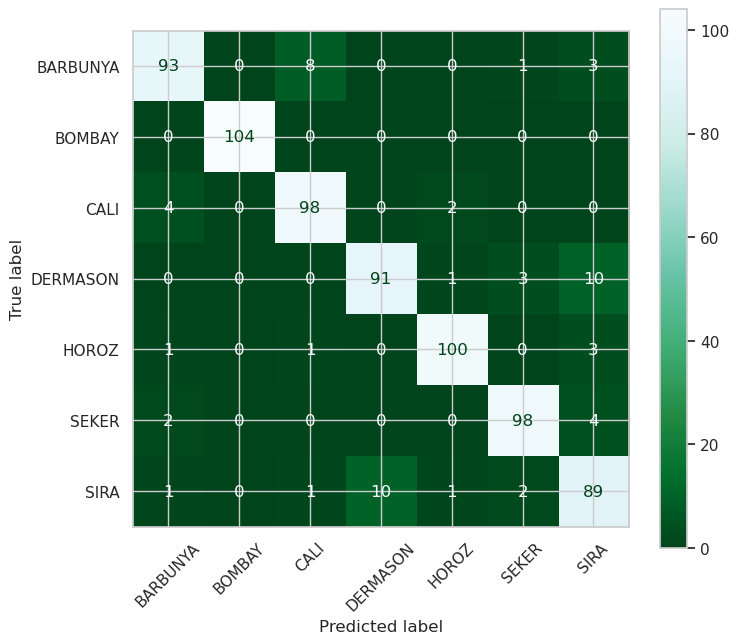

In [14]:
# evaluación del rendimiento del modelo de clasificación
metrics_class = classification_report(y_le_test, y_pred, target_names=le.classes_)
print(metrics_class)
# visualizando una matriz de confusion
cm = confusion_matrix(y_le_test, y_pred)
fig, ax = plt.subplots(figsize=(8,7))
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(ax=ax, cmap="BuGn_r")
plt.xticks(rotation=45)
plt.show()